In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean
import glob

%matplotlib inline

In [2]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as m:
    e12t=m.variables['e1t'][0,:,:]*m.variables['e2t'][0,:,:]
    tmask=m.variables['tmask'][:,:,:,:]

In [36]:
d0='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debug5c3/'
d1='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debug5LightMaster/'
d2='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheck1/' 
d3='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheck2/' 
d4='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheck3/'  
d5='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheckMort/'
d6='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheckRef/'
d7='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/debugVarCheckFlx/'

In [14]:
fname1='SalishSea_1h_20141106_20141107_carp_T_20141106-20141106.nc'
fname2='SalishSea_1h_20141106_20141107_ptrc_T_20141106-20141106.nc'

In [38]:
f0=nc.Dataset(d0+fname2)
f1=nc.Dataset(d1+fname2)
f2=nc.Dataset(d2+fname2)
f3=nc.Dataset(d3+fname2)
f4=nc.Dataset(d4+fname2)
f5=nc.Dataset(d5+fname2)
f6=nc.Dataset(d6+fname2)
f7=nc.Dataset(d7+fname2)

f0p=nc.Dataset(d0+fname1)
f5p=nc.Dataset(d5+fname1)
f7p=nc.Dataset(d7+fname1)
f0.variables.keys(),f0p.variables.keys()

(dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'nitrate', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton']),
 dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PAR', 'e3t', 'dissolved_oxygen', 'FLX_O2', 'PRD_O2', 'MSZ_O2', 'MIZ_O2', 'MRT_O2', 'REM_O2', 'RIV_O2', 'votemper', 'vosaline', 'WNDM']))

In [39]:
np.max(np.abs(tmask*f7.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [40]:
np.max(np.abs(tmask*f7.variables['flagellates'][:,:,:,:]-tmask*f0.variables['flagellates'][:,:,:,:]))

0.0

In [48]:
np.max(np.abs(tmask*f7p.variables['dissolved_oxygen'][:,:,:,:]-tmask*f5p.variables['dissolved_oxygen'][:,:,:,:]))

1.5258789e-05

In [46]:
np.max(np.abs(tmask[:,0,:,:]*f7p.variables['dissolved_oxygen'][:,0,:,:]-\
              tmask[:,0,:,:]*f5p.variables['dissolved_oxygen'][:,0,:,:]))

0.0

In [65]:
for l in range(0,24):
    print(l,np.max(np.abs(tmask[0,:,:,:]*f7p.variables['dissolved_oxygen'][l,:,:,:]-\
              tmask[0,:,:,:]*f5p.variables['dissolved_oxygen'][l,:,:,:])))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 1.5258789e-05
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0


In [49]:
np.unravel_index(np.argmax(np.abs(f7p.variables['dissolved_oxygen'][:,:,:,:]-f5p.variables['dissolved_oxygen'][:,:,:,:])), 
                    np.shape(f7p.variables['dissolved_oxygen'][:,:,:,:]))

(15, 22, 252, 239)

In [ ]:
v7=f7p.variables['dissolved_oxygen'][15,:,:,:]

(40.0, 0.0)

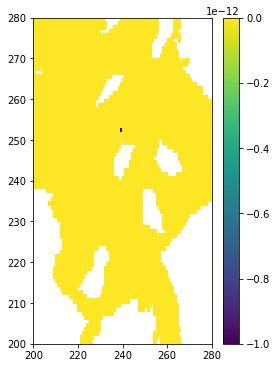

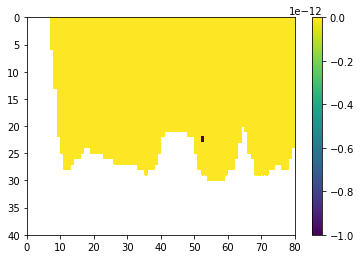

In [60]:
k=22
l=15
fig,ax=plt.subplots(1,1,figsize=(4,6))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,k,:,:]==0,
                    f7p.variables['dissolved_oxygen'][l,k,:,:]-f5p.variables['dissolved_oxygen'][l,k,:,:]),
               vmin=-1e-12,vmax=0)
fig.colorbar(m)
ax.set_xlim(200,280)
ax.set_ylim(200,280)
fig,ax=plt.subplots(1,1,figsize=(6,4))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,:,200:280,239]==0,
                    f7p.variables['dissolved_oxygen'][l,:,200:280,239]-f5p.variables['dissolved_oxygen'][l,:,200:280,239]),
               vmin=-1e-12,vmax=0)
fig.colorbar(m)
ax.set_ylim(40,0)

(40.0, 0.0)

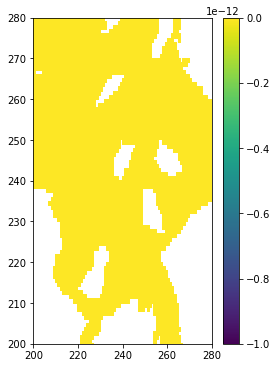

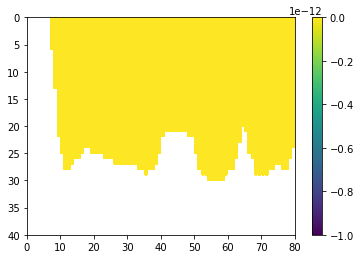

In [61]:
k=22
l=23
fig,ax=plt.subplots(1,1,figsize=(4,6))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,k,:,:]==0,
                    f7p.variables['dissolved_oxygen'][l,k,:,:]-f5p.variables['dissolved_oxygen'][l,k,:,:]),
               vmin=-1e-12,vmax=0)
fig.colorbar(m)
ax.set_xlim(200,280)
ax.set_ylim(200,280)
fig,ax=plt.subplots(1,1,figsize=(6,4))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,:,200:280,239]==0,
                    f7p.variables['dissolved_oxygen'][l,:,200:280,239]-f5p.variables['dissolved_oxygen'][l,:,200:280,239]),
               vmin=-1e-12,vmax=0)
fig.colorbar(m)
ax.set_ylim(40,0)

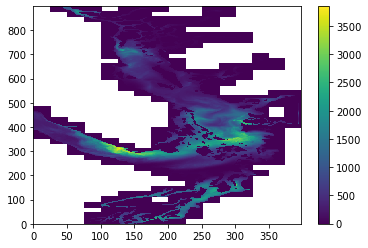

In [44]:
plt.pcolormesh(f7p.variables['FLX_O2'][-1,0,:,:])
plt.colorbar()

In [9]:
np.max(np.abs(tmask*f1.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [10]:
np.max(np.abs(tmask*f2.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [16]:
np.max(np.abs(tmask*f3.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [21]:
np.max(np.abs(tmask*f4.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [26]:
np.max(np.abs(tmask*f5.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [34]:
np.max(np.abs(tmask*f6.variables['diatoms'][:,:,:,:]-tmask*f0.variables['diatoms'][:,:,:,:]))

0.0

In [31]:
np.max(np.abs(tmask*fp.variables['dissolved_oxygen'][:,:,:,:]-tmask*f0p.variables['dissolved_oxygen'][:,:,:,:]))

0.0

In [11]:
np.max(np.abs(tmask*f1.variables['ciliates'][:,:,:,:]-tmask*f0.variables['ciliates'][:,:,:,:]))

0.0

In [12]:
np.max(np.abs(tmask*f2.variables['ciliates'][:,:,:,:]-tmask*f0.variables['ciliates'][:,:,:,:]))

0.0

In [17]:
np.max(np.abs(tmask*f3.variables['ciliates'][:,:,:,:]-tmask*f0.variables['ciliates'][:,:,:,:]))

0.0

In [22]:
np.max(np.abs(tmask*f4.variables['ciliates'][:,:,:,:]-tmask*f0.variables['ciliates'][:,:,:,:]))

0.0

In [27]:
np.max(np.abs(tmask*f5.variables['ciliates'][:,:,:,:]-tmask*f0.variables['ciliates'][:,:,:,:]))

0.0

In [18]:
np.max(np.abs(tmask*f3.variables['flagellates'][:,:,:,:]-tmask*f0.variables['flagellates'][:,:,:,:]))

0.0

In [23]:
np.max(np.abs(tmask*f4.variables['flagellates'][:,:,:,:]-tmask*f0.variables['flagellates'][:,:,:,:]))

0.0

In [28]:
np.max(np.abs(tmask*f5.variables['flagellates'][:,:,:,:]-tmask*f0.variables['flagellates'][:,:,:,:]))

0.0

In [35]:
np.max(np.abs(tmask*f6.variables['flagellates'][:,:,:,:]-tmask*f0.variables['flagellates'][:,:,:,:]))

0.0

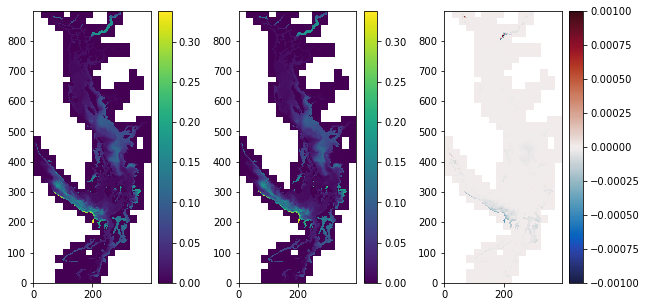

In [14]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
fig.subplots_adjust(wspace=.4)
m0=ax[0].pcolormesh(fp5a.variables['diatoms'][-1,0,:,:])
fig.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fp5c.variables['diatoms'][-1,0,:,:])
fig.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fp5c.variables['diatoms'][-1,0,:,:]-fp5a.variables['diatoms'][-1,0,:,:],cmap=cmocean.cm.balance,vmin=-1.e-3,vmax=1.e-3)
fig.colorbar(m2,ax=ax[2])

In [16]:
np.unravel_index(np.argmax(fp5c.variables['diatoms'][:,:,:,:]-fp5a.variables['diatoms'][:,:,:,:]), 
                    np.shape(fp5a.variables['diatoms'][:,:,:,:]))

(22, 3, 818, 200)